<a href="https://colab.research.google.com/github/ayaz-ncr/100ml/blob/master/6b_multilabel_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import the libraries

In [0]:
import pandas as pd
import numpy as np

### upload dataset file

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


### reading data into pandas dataframe


In [0]:
dataset_orig = pd.read_csv('train.csv')
dataset_orig.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
dataset_orig.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From counts, we see that there are no missing values

### Looking at the counts under each category

In [0]:
print(dataset_orig['toxic'].sum())
print(dataset_orig['severe_toxic'].sum())
print(dataset_orig['obscene'].sum())
print(dataset_orig['threat'].sum())
print(dataset_orig['insult'].sum())
print(dataset_orig['identity_hate'].sum())

15294
1595
8449
478
7877
1405


### Plotting the category counts

Text(0.5, 0, 'Category')

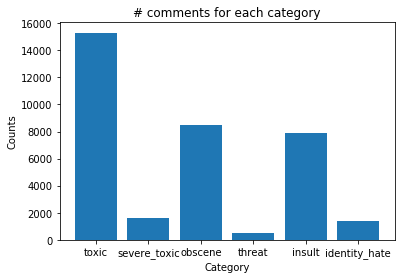

In [0]:

import matplotlib.pyplot as plt
df_sub = dataset.iloc[:,2:]
plt.bar(list(df_sub.columns.values), dataset_orig.iloc[:, 2:].sum().values)
plt.title("# comments for each category")
plt.ylabel('Counts')
plt.xlabel('Category')

  ### sampling 1000 rows from the dataset

In [0]:
dataset = dataset_orig.sample(n=1000)

### Cleaning the comments column by removing non alpha numeric characters, converting to lowercase, removing stpwords and stemming 

In [0]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
    comments = re.sub('[^a-zA-Z]', ' ', dataset['comment_text'].iloc[i])
    comments = comments.lower()
    comments = comments.split()
    ps = PorterStemmer()
    comments = [ps.stem(word) for word in comments if not word in set(stopwords.words('english'))]
    comments = ' '.join(comments)
    corpus.append(comments)
dataset['comment_text'] = corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### splitting data into train and validation sets (80% + 20%)

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.20, shuffle = True)


In [0]:
X_train = train.comment_text
X_test = test.comment_text


### importing libraries for multi-label classification through pipelines

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [0]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

### creating a pipeline to calculate tf-idf values and pass it to multinomial naive bayes classifier. OneVsRestClassifier turns the multi label problem into multiple classification problems

In [0]:
nb_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(min_df=3, ngram_range=(1,3))),
                ('clf', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))
            ])


### Fit the model and calculate accuracy for validation data for different categories

In [0]:
for category in categories:
    print('{}'.format(category))
    
    # Training naive bayes + OneVsRest Classifier on train data
    nb_pipeline.fit(X_train, train[category])
    
    # Test accuracy
    prediction = nb_pipeline.predict(X_test)
    print('Test accuracy: {}'.format(accuracy_score(test[category], prediction)))
    print("\n")  
    

toxic
Test accuracy: 0.93


severe_toxic
Test accuracy: 0.99


obscene
Test accuracy: 0.955


threat
Test accuracy: 1.0


insult
Test accuracy: 0.945


identity_hate
Test accuracy: 0.99


